# 정부혁신1번가 - 정부혁신 홈페이지 분석
* 정부혁신 제안(목록) > 정부혁신국민포럼 

출처 : https://www.innogov.go.kr/ucms/ogp/sug/list.do?menuNo=300011

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프의 스타일을 지정
plt.style.use('ggplot')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 

# 주피터 노트북 안에서 그래프가 표시되도록 함
%matplotlib inline

# 데이터 로드

In [2]:
df = pd.read_csv("data/suggestion.csv")

df.shape

(188, 8)

## 데이터 미리보기

In [3]:
df.head()

,sgId,title,category,content,start,end,vote,author
0,227,국민제안 문제점 지적 및 개선사항,국민참여,"다음은""국민신문고 및 국민제안 문제점에 대한 개선제안 입니다.<<국민신문고 및 국민...",2019.07.26,2019.10.23,2,길쌈
1,226,"가정양육수당 대폭 인상을 통한 보육예산 DOWN, 아이행복 UP",보건복지,"지난 2006년부터 12년간 저출산 대책에 126조원의 재정을 투입했지만, 지난해 ...",2019.07.19,2019.10.16,1,한들바람
2,225,보안점검테스트,기타,보안점검테스트해당글 미삭제 시 삭제 조치 부탁드립니다.,2019.07.17,2019.10.14,1,보안
3,224,보안점검테스트,기타,보안점검테스트해당글 미삭세 시 삭제 조치 부탁드립니다.,2019.07.17,2019.10.14,1,보안
4,223,보안점검테스트,기타,보안점검테스트입니다.해당글 미삭제 시 삭제 조치 부탁드립니다.test,2019.07.17,2019.10.14,1,보안


In [4]:
df.tail(1)

,sgId,title,category,content,start,end,vote,author
187,1,어린이집 차량내 어린이 질식사고 등에 대한 상세한 대책이 필요하다.,안전,"최근 동두천 어린이집 차량내 어린이 질식사고가 발생하여, 이에 대한 여러가지 대책을...",2018.07.24,2018.08.23,14,헌비


## 요약

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
sgId        188 non-null int64
title       188 non-null object
category    188 non-null object
content     186 non-null object
start       188 non-null object
end         188 non-null object
vote        188 non-null int64
author      185 non-null object
dtypes: int64(2), object(6)
memory usage: 11.8+ KB


In [6]:
# Shift + tab 키를 누르면 도움말(docstring)을 보실 수 있습니다.
df.describe(include='all')

,sgId,title,category,content,start,end,vote,author
count,188.000000,188,188,186,188,188,188.000000,185
unique,NaN,186,11,186,118,118,NaN,139
top,NaN,보안점검테스트,일반행정,우선 저는 10년가까이 근무했던 회사에서 퇴사한 후 2년이 다되도록 체불임금 및 퇴...,2019.06.12,2019.09.09,NaN,생태조성
freq,NaN,3,31,1,10,10,NaN,10
mean,116.936170,NaN,NaN,NaN,NaN,NaN,41.648936,NaN
std,68.642655,NaN,NaN,NaN,NaN,NaN,213.039009,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,54.750000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,129.500000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
75%,176.250000,NaN,NaN,NaN,NaN,NaN,7.250000,NaN


In [7]:
df['category'].value_counts()

일반행정     31
보건복지     30
기타       29
안전       22
인권/평등    18
환경       13
상생협력     11
국민참여     11
사회통합      8
반부패청렴     8
공동체       7
Name: category, dtype: int64

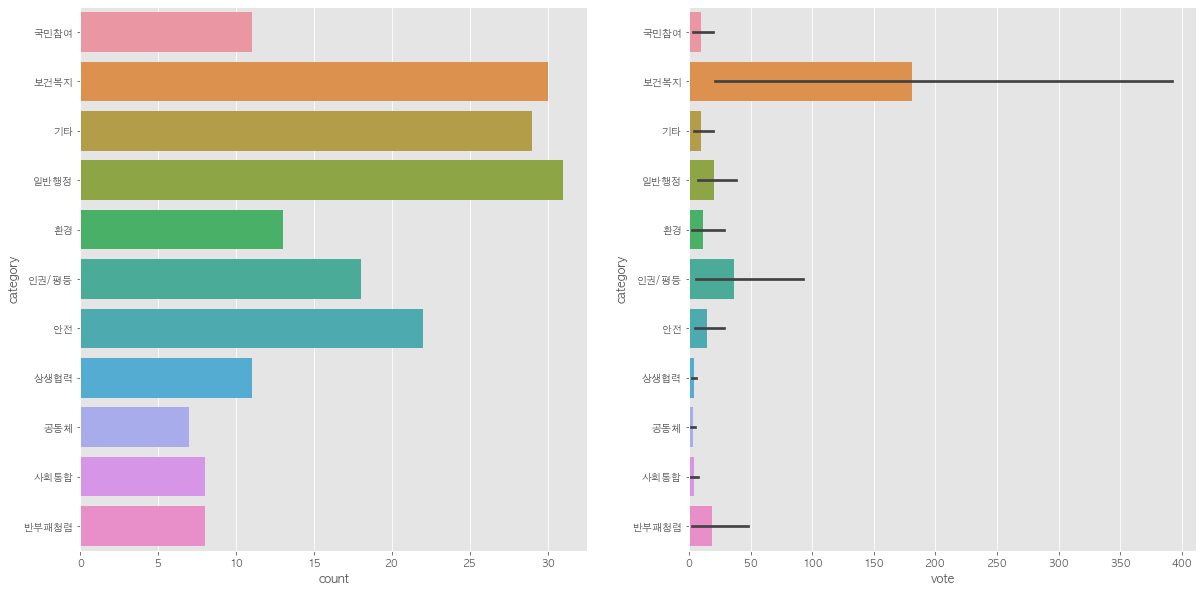

In [8]:
figure,(ax1, ax2) = plt.subplots(1, 2)
figure.set_size_inches(20,10)
# 카테고리별 제안수
sns.countplot(data=df, y="category", ax=ax1)
# 카테고리별 평균 투표수
sns.barplot(data=df, x="vote", y="category", ax=ax2)

In [9]:
df_vote_200 = df[df["vote"] < 200]
df_vote_200

,sgId,title,category,content,start,end,vote,author
0,227,국민제안 문제점 지적 및 개선사항,국민참여,"다음은""국민신문고 및 국민제안 문제점에 대한 개선제안 입니다.<<국민신문고 및 국민...",2019.07.26,2019.10.23,2,길쌈
1,226,"가정양육수당 대폭 인상을 통한 보육예산 DOWN, 아이행복 UP",보건복지,"지난 2006년부터 12년간 저출산 대책에 126조원의 재정을 투입했지만, 지난해 ...",2019.07.19,2019.10.16,1,한들바람
2,225,보안점검테스트,기타,보안점검테스트해당글 미삭제 시 삭제 조치 부탁드립니다.,2019.07.17,2019.10.14,1,보안
3,224,보안점검테스트,기타,보안점검테스트해당글 미삭세 시 삭제 조치 부탁드립니다.,2019.07.17,2019.10.14,1,보안
4,223,보안점검테스트,기타,보안점검테스트입니다.해당글 미삭제 시 삭제 조치 부탁드립니다.test,2019.07.17,2019.10.14,1,보안
5,222,정부조직법 부처 개편 일부 개정안(추가 일부 변경),일반행정,<정부조직법 부처 개편 일부 개정안(추가 일부 변경)>1. 외교부+통일부 통합-> ...,2019.07.16,2019.10.13,2,jong176
6,221,아파트 건설 현장,환경,현재 문제점1.청소시 먼지2.공사ㅈ기초 발주및 건물 입상시제안 취지1.소음.미세먼...,2019.07.15,2019.10.12,3,서청진
7,220,도서관 냉방,일반행정,순천에 사는데요 순천시립 도서관(순천대하교앞)학생들이 공부하는 곳은 넘무추워서 냉방...,2019.07.08,2019.10.05,1,블랙타이거킹
8,219,동남아 여성의 한국남성과의 결혼이민의 장단점을 알리는 홍보물 만들어 주세요,인권/평등,(제안배경)한류와 K-POP 그리고 K-드라마의 영향으로 많은 동남아 여성들이 한국...,2019.07.08,2019.10.05,9,디딤돌
9,218,"아동폭력, 청소년 폭력에 대한 신고의 범위 확대를 위한 행정안전부와 보건복지부의 협...",인권/평등,"(제안배경)저는 신기하게 지난 일주일간 한건의 아동폭력을 목격하고, 또한건의 청소년...",2019.07.08,2019.10.05,56,디딤돌


In [10]:
df.groupby(
    ['category'])['vote'].sum().reset_index(
).sort_values('vote', ascending=False)

,category,vote
4,보건복지,5427
8,인권/평등,665
9,일반행정,637
7,안전,315
2,기타,285
10,환경,152
3,반부패청렴,149
1,국민참여,104
6,상생협력,44
5,사회통합,30


In [11]:
# 카테고리별 전체 투표수
df_category_vote = pd.DataFrame(df.groupby(['category'])['vote'].sum()) \
                            .reset_index().sort_values('vote', ascending=False)
df_category_vote.head()

,category,vote
4,보건복지,5427
8,인권/평등,665
9,일반행정,637
7,안전,315
2,기타,285


# 기간

In [12]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

df[['start', 'end']].head()

,start,end
0,2019-07-26,2019-10-23
1,2019-07-19,2019-10-16
2,2019-07-17,2019-10-14
3,2019-07-17,2019-10-14
4,2019-07-17,2019-10-14


In [13]:
df.dtypes

sgId                 int64
title               object
category            object
content             object
start       datetime64[ns]
end         datetime64[ns]
vote                 int64
author              object
dtype: object

In [14]:
df['start-date'] = df['start'].dt.date
df['start-month'] = df['start'].dt.year.astype(str) +"-"+ df['start'].dt.month.astype(str)
df['start-weekday'] = df['start'].dt.dayofweek

In [15]:
df[['start-date', 'start-month', 'start-weekday']].head()

,start-date,start-month,start-weekday
0,2019-07-26,2019-7,4
1,2019-07-19,2019-7,4
2,2019-07-17,2019-7,2
3,2019-07-17,2019-7,2
4,2019-07-17,2019-7,2


https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.dt.dayofweek.html

In [16]:
weekday = {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
df['weekday'] = df['start-weekday'].map(weekday)
df[['start-month', 'start-weekday', 'weekday']].head()

,start-month,start-weekday,weekday
0,2019-7,4,금
1,2019-7,4,금
2,2019-7,2,수
3,2019-7,2,수
4,2019-7,2,수


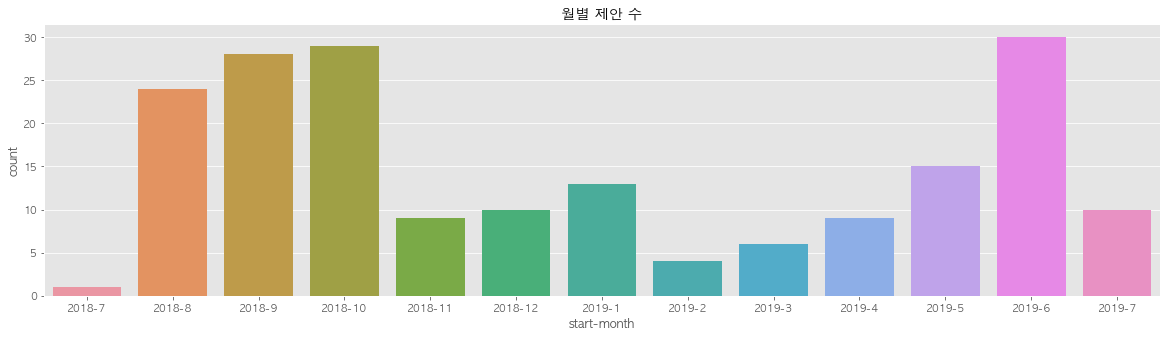

In [17]:
plt.figure(figsize=(20,5))
plt.title('월별 제안 수')
sns.countplot(data=df.sort_values(by="start-date", ascending=True), x="start-month")

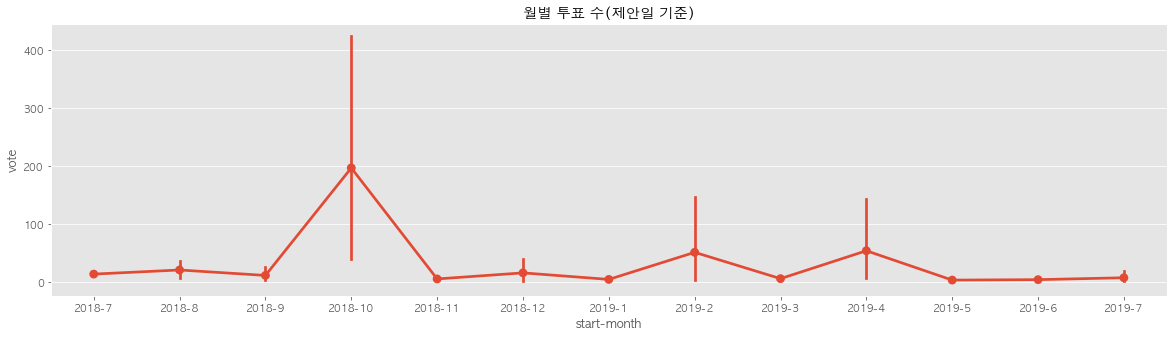

In [18]:
plt.figure(figsize=(20,5))
plt.title('월별 투표 수(제안일 기준)')
sns.pointplot(data=df.sort_values(by="start-date", ascending=True), x="start-month", y="vote")

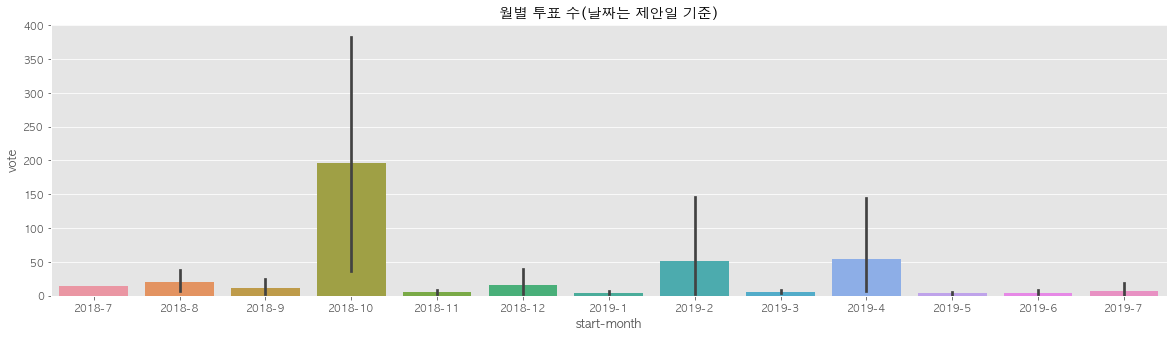

In [19]:
plt.figure(figsize=(20,5))
plt.title('월별 투표 수(날짜는 제안일 기준)')
sns.barplot(data=df.sort_values(by="start-date", ascending=True), x="start-month", y="vote")

10월에 가장많은 투표가 있었는데 편차가 큰것으로 보아 일부 제안이 다른 제안에 비해 많은 투표를 받은 것이라고 가설을 세워볼 수 있을거 같다.
2월에는 제안수는 적지만 투표수는 많다.

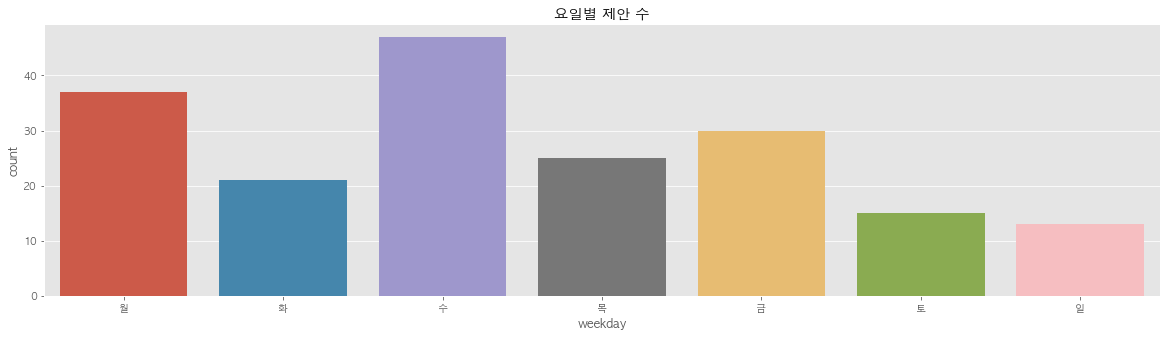

In [20]:
plt.figure(figsize=(20,5))
plt.title('요일별 제안 수')
sns.countplot(data=df.sort_values(by="start-weekday"), x="weekday")

* 투표수는 날짜를 추출할 수 없어서 제안이 들어온 날을 기준으로 집계됨

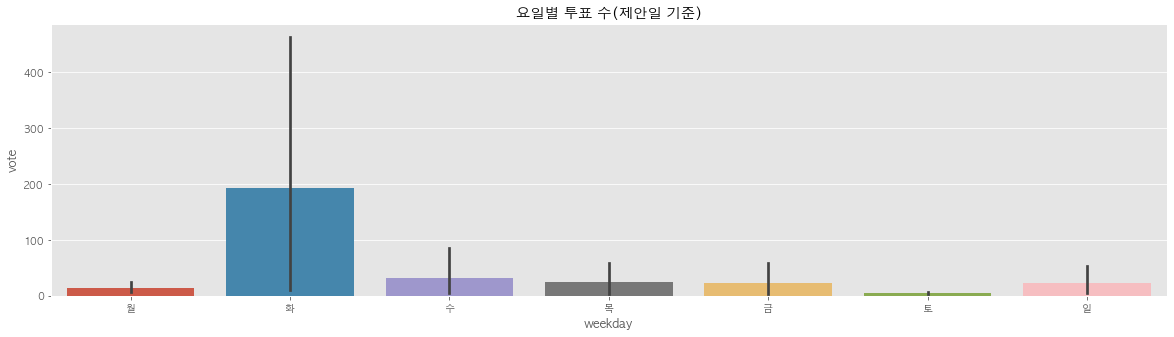

In [21]:
plt.figure(figsize=(20,5))
plt.title('요일별 투표 수(제안일 기준)')
sns.barplot(data=df.sort_values(by="start-weekday"), x="weekday", y="vote")

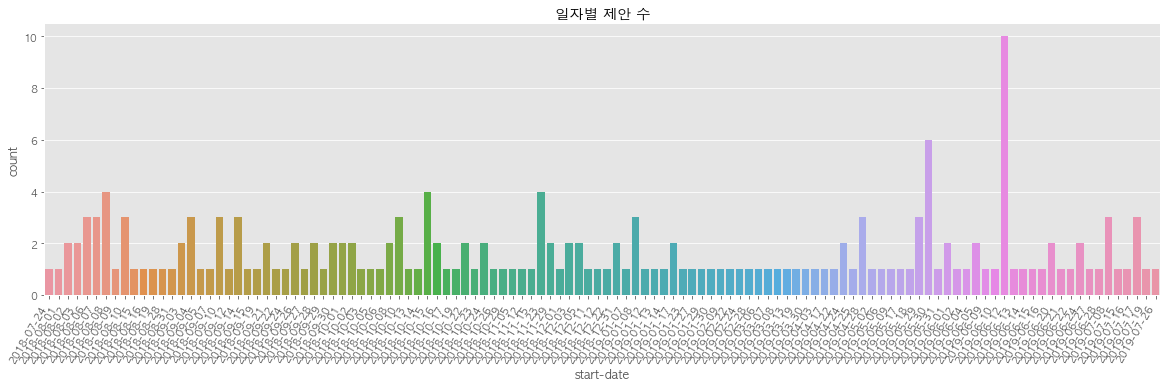

In [22]:
plt.figure(figsize=(20,5))
plt.title('일자별 제안 수')
plt.xticks(rotation=60, ha='right')
sns.countplot(data=df.sort_values(by="start-date"), x="start-date")

In [23]:
df_06_10 = df[df['start'] > '2019-06-10']
df_06_10['start-date'].value_counts()

2019-06-12    10
2019-07-08     3
2019-07-17     3
2019-06-24     2
2019-06-20     2
2019-07-15     1
2019-07-19     1
2019-06-28     1
2019-06-13     1
2019-06-16     1
2019-06-14     1
2019-06-27     1
2019-06-22     1
2019-07-16     1
2019-06-15     1
2019-06-21     1
2019-07-26     1
Name: start-date, dtype: int64

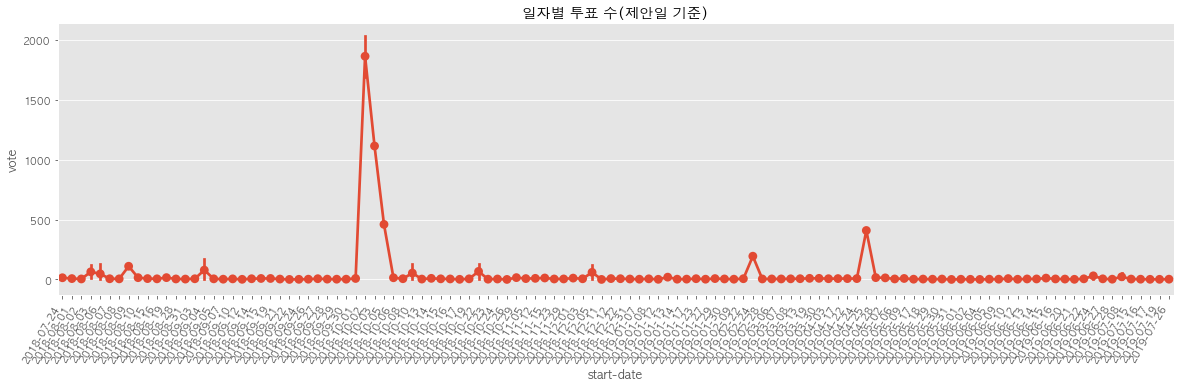

In [24]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('일자별 투표 수(제안일 기준)')
sns.pointplot(data=df.sort_values(by="start-date"), x="start-date", y="vote")

In [25]:
df.head()

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday
0,227,국민제안 문제점 지적 및 개선사항,국민참여,"다음은""국민신문고 및 국민제안 문제점에 대한 개선제안 입니다.<<국민신문고 및 국민...",2019-07-26,2019-10-23,2,길쌈,2019-07-26,2019-7,4,금
1,226,"가정양육수당 대폭 인상을 통한 보육예산 DOWN, 아이행복 UP",보건복지,"지난 2006년부터 12년간 저출산 대책에 126조원의 재정을 투입했지만, 지난해 ...",2019-07-19,2019-10-16,1,한들바람,2019-07-19,2019-7,4,금
2,225,보안점검테스트,기타,보안점검테스트해당글 미삭제 시 삭제 조치 부탁드립니다.,2019-07-17,2019-10-14,1,보안,2019-07-17,2019-7,2,수
3,224,보안점검테스트,기타,보안점검테스트해당글 미삭세 시 삭제 조치 부탁드립니다.,2019-07-17,2019-10-14,1,보안,2019-07-17,2019-7,2,수
4,223,보안점검테스트,기타,보안점검테스트입니다.해당글 미삭제 시 삭제 조치 부탁드립니다.test,2019-07-17,2019-10-14,1,보안,2019-07-17,2019-7,2,수


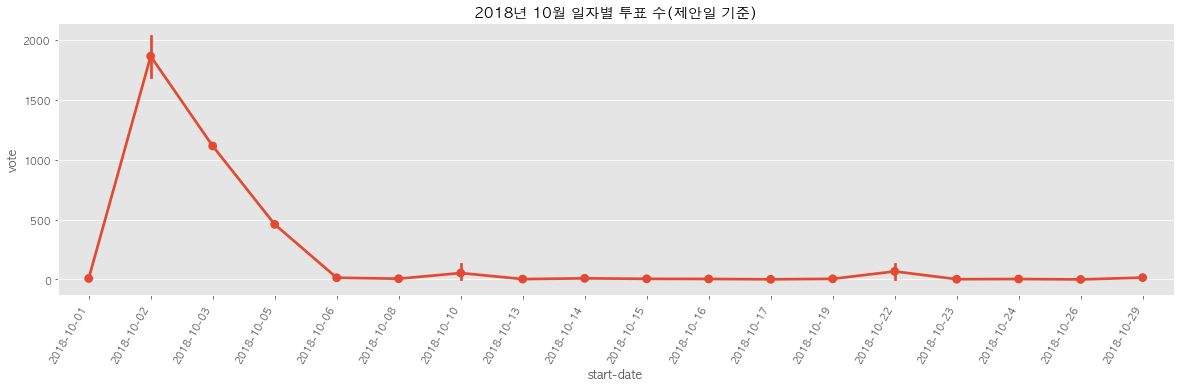

In [26]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('2018년 10월 일자별 투표 수(제안일 기준)')
df_2018_10 = df[(df["start"] >= "2018-10-01") & (df["start"] < "2018-11-01")]
sns.pointplot(data=df_2018_10.sort_values(by="start-date"), x="start-date", y="vote")

In [27]:
df.loc[df["vote"] > 2000, ["sgId", "start", "title", "category", "content"]]

,sgId,start,title,category,content
131,64,2018-10-02,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...


해당 정책 링크 :
https://www.innogov.go.kr/ucms/ogp/sug/view.do?menuNo=300011&sgId=64

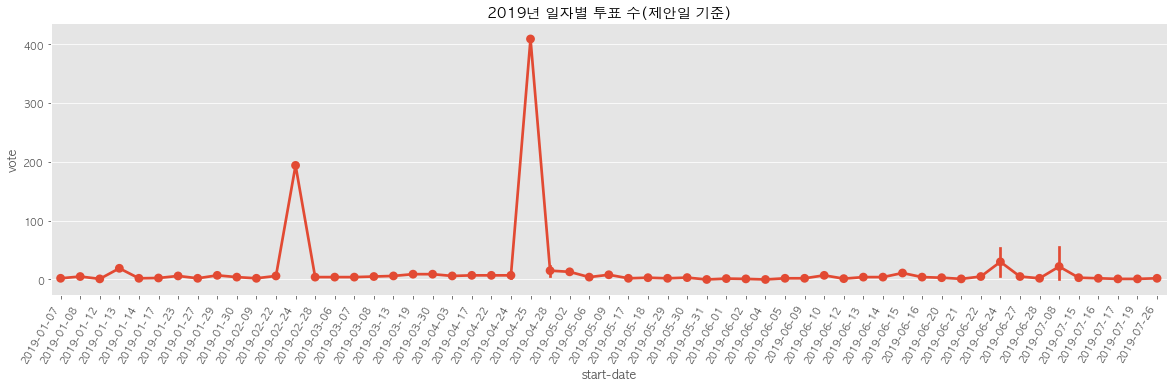

In [28]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('2019년 일자별 투표 수(제안일 기준)')
df_2019 = df[df["start"] > '2018-12-31']
sns.pointplot(data=df_2019.sort_values(by="start-date"), x="start-date", y="vote")

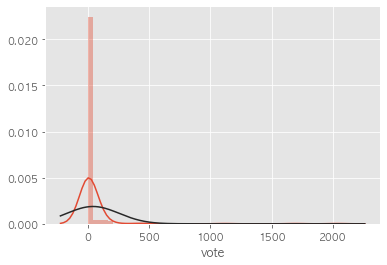

In [29]:
from scipy.stats import norm
sns.distplot(df['vote'], fit=norm)

In [30]:
# 종료된 제안 수
df[df['end'] < '2019-06-17'].shape

(123, 12)

In [31]:
# 종료 여부 컬럼 생성
df['close'] = df['end'] < '2019-06-17'

In [32]:
# 종료 여부 건 비교
df['close'].value_counts()

True     123
False     65
Name: close, dtype: int64

In [33]:
preview_columns = ["sgId", "title", "category", "content", "vote", "start"]
df_top_vote = df.sort_values(by='vote', ascending=False).head(10)
df_top_vote[preview_columns]

,sgId,title,category,content,vote,start
131,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037,2018-10-02
132,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693,2018-10-02
130,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115,2018-10-03
129,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460,2018-10-05
58,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,409,2019-04-25
71,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,194,2019-02-24
159,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167,2018-09-04
112,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133,2018-10-22
179,10,"불법 체류자, 외국인 근로자를 제한하고, 대한민국 국민의 일자리를 보호해 주십시오.",기타,<현재 불법 체류자. 외국인 근로자 급증이 사회적 문제로 떠오르고 있습니다.>현재 ...,132,2018-08-06
124,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126,2018-10-10


In [34]:
df_vote_100 = df.loc[df['vote'] > 100, preview_columns]
print('100개 이상 투표를 받은 제안 :', len(df_vote_100))
df_vote_100

100개 이상 투표를 받은 제안 : 13


,sgId,title,category,content,vote,start
58,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,409,2019-04-25
71,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,194,2019-02-24
92,131,공직자 임용 및 선출직 입후보 배제 원칙 강화,반부패청렴,선출직이든 정무직이든 일반직이든 입법 행정 사법 3부 및 전국 지자체의모든 공무원은...,119,2018-12-05
112,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133,2018-10-22
124,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126,2018-10-10
129,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460,2018-10-05
130,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115,2018-10-03
131,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037,2018-10-02
132,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693,2018-10-02
159,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167,2018-09-04


In [35]:
# 가장 많은 건 수가 있는 일반행정 분야의 제안을 투표수 별로 정렬해서 봅니다.
df[df['category'] == '일반행정'].sort_values(
    by='vote', ascending=False).head()

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
71,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,2019-02-24,2019-05-24,194,무한소,2019-02-24,2019-2,6,일,True
159,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,2018-09-04,2018-12-02,167,NaN,2018-09-04,2018-9,1,화,True
124,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,2018-10-10,2019-01-07,126,안전역량,2018-10-10,2018-10,2,수,True
123,72,정부부처 공모사업을 한눈에 보고싶습니다.,일반행정,저는 지자체에서 혁신업무 및 기획업무를 담당하고있습니다.작은 지방이라 공모사업 선정...,2018-10-10,2019-01-07,33,혁신선두,2018-10-10,2018-10,2,수,True
41,182,가업상속제도 이대로 좋은가?,일반행정,"[ 가업상속제도 이대로 좋은가? ]''매출액 3,000억원 미만 기업에 적용하는 가...",2019-05-30,2019-08-27,10,hyusco,2019-05-30,2019-5,3,목,False


## WordCloud

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor = 'white', width=1600, height=800):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [37]:
from konlpy.tag import Mecab
mecab = Mecab()

In [38]:
# mecab 으로 명사만 추출합니다.
%time mecab_content_nouns = mecab.nouns(''.join(str(df['content'].fillna(''))))
mecab_content_nouns[-10:]

CPU times: user 24.9 ms, sys: 84.3 ms, total: 109 ms
Wall time: 456 ms


['어린이집', '차량', '내', '어린이', '질식', '사고', '발생', '이', '가지', '대책']

In [39]:
def mecab_nouns_wordcloud(content):
    mecab_content_nouns = mecab.nouns(''.join(str(content.fillna(''))))
    displayWordCloud(' '.join(mecab_content_nouns))

In [40]:
# 불용어 사전을 지정하면 해당 단어는 제외하고 워드클라우드를 그립니다.
# 다른 단어들을 좀 더 자세히 표현하고자 아래 텍스트를 제거하고 그립니다.
STOPWORDS = ["정부", "혁신", "문제점", "사업", "현황", "조직", "축사", "방법", "미만", "내용", "각종", "신설", "필요시"]

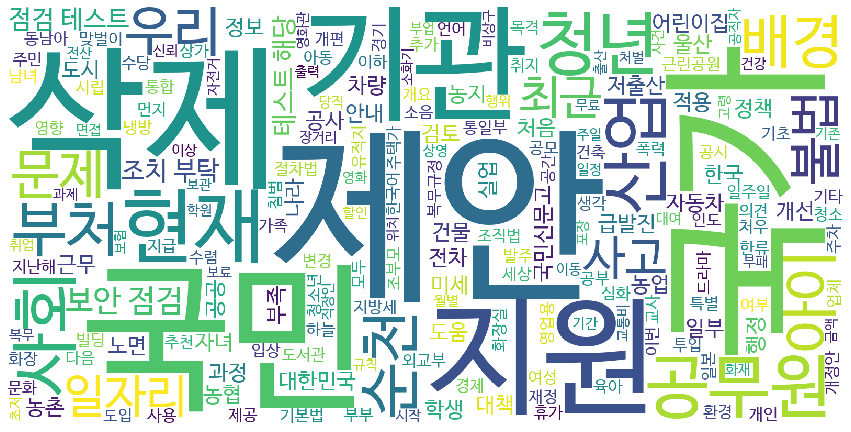

In [41]:
mecab_nouns_wordcloud(df['content'])

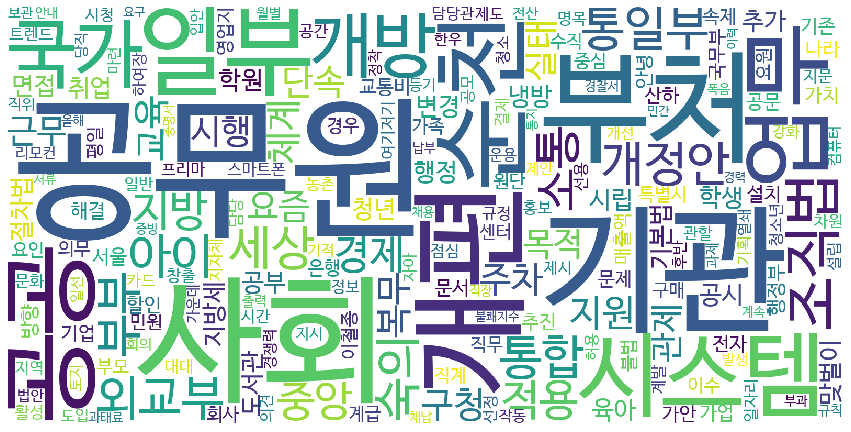

In [42]:
content = df.loc[df['category'] == "일반행정", "content"]
mecab_nouns_wordcloud(content)

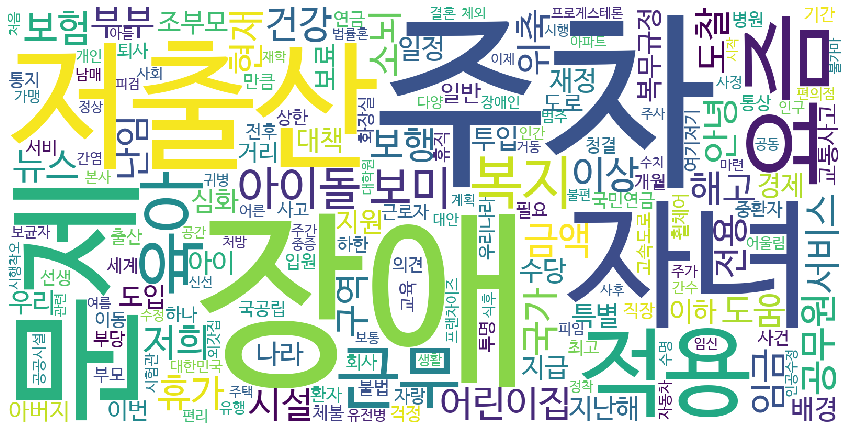

In [43]:
content = df.loc[df['category'] == "보건복지", "content"]
mecab_nouns_wordcloud(content)

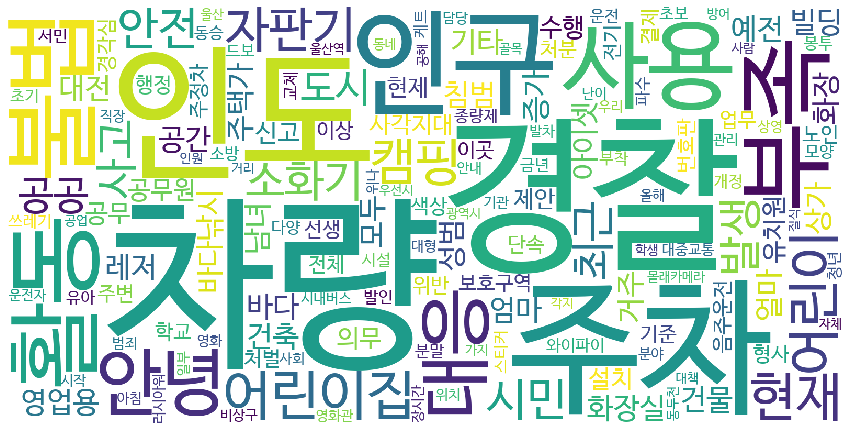

In [44]:
content = df.loc[df['category'] == "안전", "content"]
mecab_nouns_wordcloud(content)

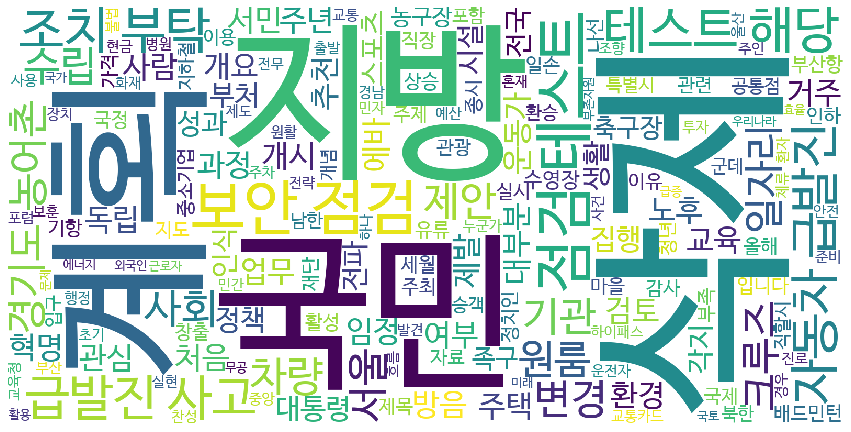

In [45]:
content = df.loc[df['category'] == "기타", "content"]
mecab_nouns_wordcloud(content)

In [46]:
import re
p = r'.*(난임|불임|임신).*'
pregnant = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
pregnant.shape

(5, 13)

In [47]:
pregnant.sort_values(by="vote", ascending=False)

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
131,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2018-10-02,2018-12-30,2037,엄마란소리,2018-10-02,2018-10,1,화,True
132,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",2018-10-02,2018-12-30,1693,곰돌이네,2018-10-02,2018-10,1,화,True
130,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,2018-10-03,2018-12-31,1115,알지온,2018-10-03,2018-10,2,수,True
54,169,체당금 관련 법안에 관해서 건의드립니다.,보건복지,우선 저는 10년가까이 근무했던 회사에서 퇴사한 후 2년이 다되도록 체불임금 및 퇴...,2019-05-02,2019-07-30,13,꿀떵이맘,2019-05-02,2019-5,3,목,False
122,74,산부인과 초음파비용,보건복지,결혼한 후 1년이내 피임을 하지않는범주에서 자녀가생기지 않으면 난임부부라고 말합니다...,2018-10-13,2019-01-10,3,모모,2018-10-13,2018-10,5,토,True


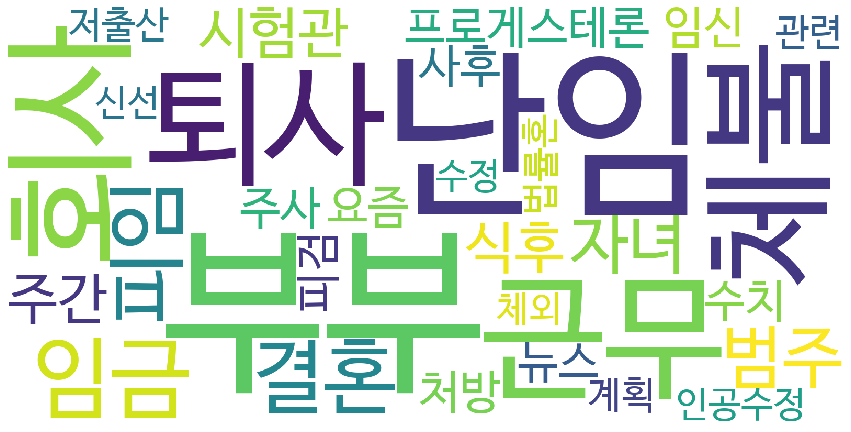

In [48]:
content = pregnant["content"]
mecab_nouns_wordcloud(content)

In [49]:
p = r'.*(미세먼지).*'
air = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
air

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
6,221,아파트 건설 현장,환경,현재 문제점1.청소시 먼지2.공사ㅈ기초 발주및 건물 입상시제안 취지1.소음.미세먼...,2019-07-15,2019-10-12,3,서청진,2019-07-15,2019-7,0,월,False
15,209,"맑은하늘, 가족들이 즐겁게 나들이",환경,"맑은하늘, 가족들이 즐겁게 나들이 할 수 있는환경인 대한민국이 되었으면 좋겠어요미세...",2019-06-21,2019-09-18,1,선진,2019-06-21,2019-6,4,금,False
68,155,미세 먼지 저감 아이디어 - 자동차가 공기 청정기가 된다면?,환경,아래와 같이 정리했듯이 자동차를 공해의 주범이 아닌 공기 청정의 주역으로 바꾸는 아...,2019-03-07,2019-06-04,4,봉팔버미,2019-03-07,2019-3,3,목,True
144,52,저속으로 이용되고 있는 수도권 고속도로 운영방식 개선,기타,(현 황)정부에서는 교통의 원활한 흐름을 위해 정부예산 또는 민간투자(민자)를 ...,2018-09-22,2018-12-20,0,사회적가치,2018-09-22,2018-9,5,토,True


In [50]:
p = r'.*(자동차).*'
car = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
car

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
11,216,공시송달 의뢰공문의 전국배포를 중단하여 문서로 인한 스트레스 해소와 행정업무 효율성 증대,일반행정,"[현황 및 문제점]​0.행정절차법 제14조4항,지방세기본법 제33조2항에서는 공시송...",2019-06-27,2019-09-24,5,민첩지킴이,2019-06-27,2019-6,3,목,False
34,189,간병인비에 대한 국민건강보험공단 차원에서의 지원정책,보건복지,"저희 아버지가 이번에 교통사고를 당하셨습니다. 도로도 아니고, 일반 거리에서 차가 ...",2019-06-05,2019-09-02,3,행운의여신,2019-06-05,2019-6,2,수,False
41,182,가업상속제도 이대로 좋은가?,일반행정,"[ 가업상속제도 이대로 좋은가? ]''매출액 3,000억원 미만 기업에 적용하는 가...",2019-05-30,2019-08-27,10,hyusco,2019-05-30,2019-5,3,목,False
68,155,미세 먼지 저감 아이디어 - 자동차가 공기 청정기가 된다면?,환경,아래와 같이 정리했듯이 자동차를 공해의 주범이 아닌 공기 청정의 주역으로 바꾸는 아...,2019-03-07,2019-06-04,4,봉팔버미,2019-03-07,2019-3,3,목,True
85,138,각 시.구청 불법주정차위반 단속차량에 도로 포트홀 업무 추가 제안,안전,현황 및 문제점1.현재는 불법주정차 차량 위반 단속 업무만 합니다.2.가끔씩 보면 ...,2019-01-08,2019-04-07,2,걷자,2019-01-08,2019-1,1,화,True
101,121,국가유공자에 대한 대우,반부패청렴,﻿★﻿국가유공자☆​나﻿라를 위해 목숨을 바쳐서 현재까지 이렇게 전쟁의 공포나 기근 ...,2018-11-23,2019-02-20,1,선한사마리아girl,2018-11-23,2018-11,4,금,True
107,108,자동차급발진사고에 대해서~~~,기타,"국정감사 자료에 의하면""6년간 자동차급발진사고 449건""이렇게 많이 생긴것을 왜? ...",2018-10-26,2019-01-23,0,해오름,2018-10-26,2018-10,4,금,True
127,68,장애인전용주차구역 단속 의견진술 처리의 공정성 제고방안 제도개선,보건복지,장애인 전용 주차구역은 보행장애인이 자동차를 편리하게 주차할 수 있는 전용주차구역을...,2018-10-08,2019-01-05,1,소피라테스,2018-10-08,2018-10,0,월,True
145,51,아파트 복도 창문을 활짝 열고 싶어요.,환경,"""특별피난계단의 계단실 및 부속실 제연설비의 화재안전기준""(소방방재청 고시) 제21...",2018-09-21,2018-12-19,1,국민소통,2018-09-21,2018-9,4,금,True
160,31,사회적인 문제점 자동차급발진사고와 BMW 화재 사건에 대해서~~~,기타,사회적인 문제점 자동차급발진사고와 BMW 화재 사건에 대해서~~~자동차급발진사고은 ...,2018-09-04,2018-12-02,3,해오름,2018-09-04,2018-9,1,화,True


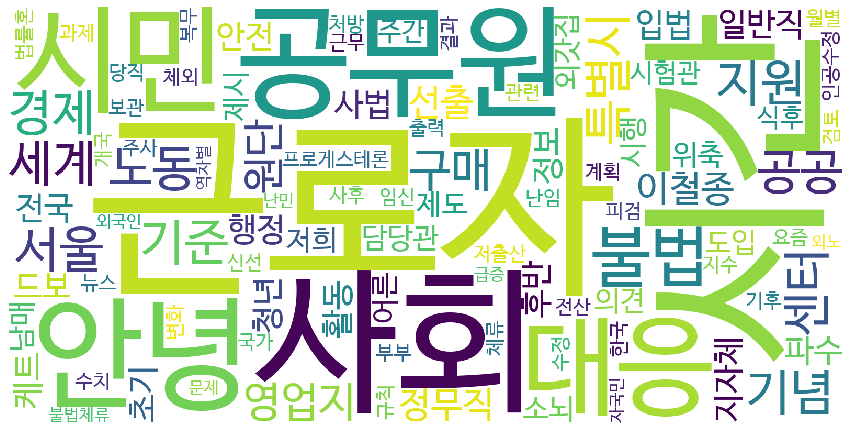

In [51]:
# 100개 이상의 투표를 받은 제안
content = df_vote_100["content"]
mecab_nouns_wordcloud(content)